In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
x=np.load("../data/X_data.npy")
y=np.load("../data/Y_data.npy")
# print(x)
print(y)

[2 0 0 0 0 1 2 0 1 2 1 1 1 2 2 1 2 2 0 1 1 1 1 1 1 0 2 2 2 2 1 0 2 2 1 0 0
 0 0 2 1 1 2 1 1 1 0 2 2 2 1 1 1 0 2 0 0 1 1 0 2 0 2 1 0 2 2 2 1 0 1 0 2 2
 1 1 2 2 1 2 0 2 2 2 1 1 1 1 1 2 2 2 1 2 2 2 0 1 0 0 2 2 2 2 0 0 1 2 0 1 1
 1 0 1 2 0 2 1 2 0 2 1 2 2 2 0 1 2 1 1 0 1 1 1 1 1 0 1 0 0 1 0 2 0 0 2 0 2
 2 2 2 1 2 1 0 2 1 0 1 2 2 2 2 0 2 2 2 0 2 1 2 0 0 1 1 0 0 1 0 1 1 2 0 0 2
 0 1 0 0 0 1 2 1 0 1 1 2 0 0 1 0 2 1 2 1 0 1 0 0 1 0 1 2 1 2 2 1 2 0 1 2 1
 1 0 0 0 2 0 2 2 1 1 0 1 1 1 0 0 0 2 0 0 2 0 1 1 1 2 1 2 2 0 2 2 2 0 0 0 2
 2 2 0 1 2 2 0 2 2 0 2 1 0 0 0 0 2 1 1 1 2 0 0 1 1 2 0 1 0 0 2 2 2 1 1 0 1
 0 2 2 0 0 1 1 2 0 1 2 1 0 2 1 1 0 1 1 0 1 1 2 0 1 1 2 2 0 0 2 2 2 0 0 0 1
 1 0 1 1 2 0 0 2 1 2 0 1 0 1 0 1 1 0 2 2 2 1 0 1 0 1 0 0 2 0 1 2 0 2 0 0 0
 1 2 2 2 0 0 2 0 2 0 1 0 1 0 2 2 0 1 0 0 0 2 1 1 1 0 0 2 0 1 1 2 0 1 1 2 0
 1 1 1 0 0 1 2 2 0 1 0 1 2 2 1 2 0 1 0 0 1 2 2 2 0 0 1 0 0 2 1 2 1 1 0 2 0
 1 2 1 2 1 2 1 2 2 0 1 0 0 2 0 0 1 0 2 2 1 1 2 2 2 0 0 1 1 2 0 1 2 0 0 0 0
 2 2 2 0 2 1 1 2 1 1 1 0 

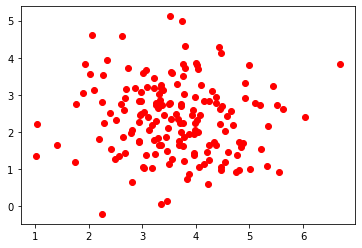

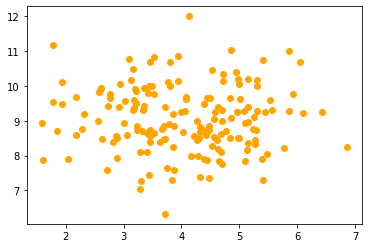

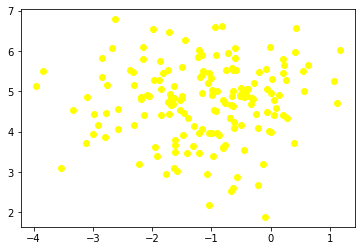

In [24]:
feature_1=x[:,0]
feature_2=x[:,1]
plt.scatter(feature_1[y==0],feature_2[y==0],c="red")
plt.show()
plt.scatter(feature_1[y==1],feature_2[y==1],c="orange")
plt.show()
plt.scatter(feature_1[y==2],feature_2[y==2],c="yellow")
plt.show()

In [29]:
print(x[y==0].shape)
print(x[y==0,0].shape)
print(set(y))

(167, 2)
(167,)
{0, 1, 2}


In [26]:
colors=[]
def getColor(y):
    for category in y:
        if(category==0):
            colors.append("red")
        elif(category==1):
            colors.append("orange")
        else:
            colors.append("yellow")
getColor(y)
print(colors)


['yellow', 'red', 'red', 'red', 'red', 'orange', 'yellow', 'red', 'orange', 'yellow', 'orange', 'orange', 'orange', 'yellow', 'yellow', 'orange', 'yellow', 'yellow', 'red', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'orange', 'red', 'yellow', 'yellow', 'orange', 'red', 'red', 'red', 'red', 'yellow', 'orange', 'orange', 'yellow', 'orange', 'orange', 'orange', 'red', 'yellow', 'yellow', 'yellow', 'orange', 'orange', 'orange', 'red', 'yellow', 'red', 'red', 'orange', 'orange', 'red', 'yellow', 'red', 'yellow', 'orange', 'red', 'yellow', 'yellow', 'yellow', 'orange', 'red', 'orange', 'red', 'yellow', 'yellow', 'orange', 'orange', 'yellow', 'yellow', 'orange', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'orange', 'orange', 'orange', 'orange', 'orange', 'yellow', 'yellow', 'yellow', 'orange', 'yellow', 'yellow', 'yellow', 'red', 'orange', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'orange', 'yellow', 

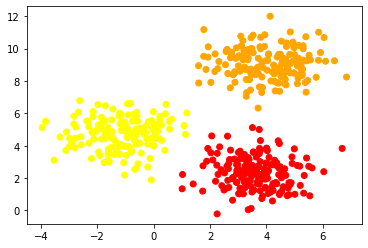

In [27]:
plt.scatter(feature_1,feature_2,c=colors)

In [32]:

uni,count=np.unique(y,return_counts=True)
print(count)

[167 167 166]


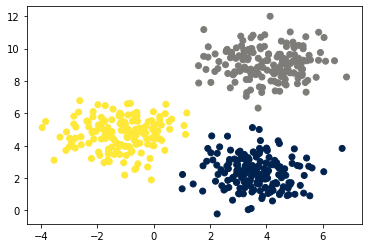

In [36]:
plt.scatter(feature_1,feature_2,c=y,cmap=plt.cm.cividis)

In [ ]:
AIM: Given some training data (X,Y), I have to predict the category of new test_point (X)

1. Calculate the distance of test point from every data point in training data.
2. Sort my distances, such that corresponding indices are known
3. Pick first K indices
4. Get the category corresponding to k indices 
5. Count the no. of samples of each category in the knn
6. Prediction = category with max count

In [84]:
def distance(pt1,pt2):
    d = ((pt1[0]-pt2[0])**2 + (pt1[1]-pt1[1])**2)**0.5
    return d

def getCategory(category):
        if(category==0):
            return "category 1"
        elif(category==1):
            return "category 2"
        else:
            return "category 3"

def predict(x_train,y_train,test_point,k=3):
    distances=[0]*len(x_train)

    for i in range(len(x_train)):
        distances[i]=[distance(test_point,x_train[i]),i]
    print(distances)
    distances=sorted(distances)[0:k]
    print(distances)

    r=[0]*(len(distances))

    for j in range(len(distances)):
        r[j]=y[distances[j][1]]
    print(r)

    uni,coun=np.unique(r,return_counts=True)
    coun=coun.tolist()
    print(coun)
    print(coun.index(max(coun)))
    print(getCategory(coun.index(max(coun))))
        
predict(x,y,[4,3],3)
# compute distance from each training point

[[7.541222446100469, 0], [0.965300677237555, 1], [1.9006569824229436, 2], [2.0430814881692907, 3], [0.4707236045600558, 4], [0.13595323835949813, 5], [7.122100438229202, 6], [0.8871009499109643, 7], [0.05351586056770774, 8], [4.214839909766249, 9], [0.6440482959309524, 10], [0.8582312580532241, 11], [0.9729853027512805, 12], [5.719741601437196, 13], [4.385122062871039, 14], [1.1781030921628601, 15], [5.231973432616922, 16], [4.284301669323359, 17], [0.14954994719495396, 18], [0.13478757687321608, 19], [1.3098819756876532, 20], [0.47007729749078697, 21], [0.284030785011109, 22], [0.47826635433790887, 23], [0.7121096109505443, 24], [0.5384791138565901, 25], [6.9864989415160865, 26], [5.032081831675719, 27], [3.9417633369432745, 28], [4.9125895879456385, 29], [0.0060404080704783425, 30], [0.7625299016974019, 31], [4.994139603835363, 32], [4.024771987440927, 33], [0.6050589216955515, 34], [2.69475996761164, 35], [0.3702141265191763, 36], [1.3312062485668559, 37], [2.2606488507396434, 38], 